In [11]:
# Importing necessary libraries
from sklearn.ensemble import BaggingClassifier  # Importing the BaggingClassifier from the sklearn.ensemble module
from sklearn.neighbors import KNeighborsClassifier  # Importing KNeighborsClassifier from the sklearn.neighbors module
import pandas as pd  # Importing pandas for data manipulation

# Suppressing warnings to avoid cluttered output
import warnings
warnings.filterwarnings('ignore')  # This line will suppress any warning messages that may appear


In [2]:
from sklearn.datasets import load_breast_cancer  # Importing a built-in dataset: Breast Cancer data

# Loading the Breast Cancer dataset
dataset = load_breast_cancer()  # The dataset is returned as a dictionary-like object

# The dataset contains features, target labels, and metadata
# You can access features using dataset['data'] and target labels using dataset['target']

# Example of accessing dataset properties:
# dataset['data']: The feature matrix (input data)
# dataset['target']: The output labels (benign/malignant)
# dataset['feature_names']: The names of the features (columns)
# dataset['DESCR']: A description of the dataset


In [3]:
# Separating the features (input data) and the target labels (output data)
x = dataset.data  # X contains the feature matrix (input data) with all observations and their respective features
y = dataset.target  # y contains the target labels (output data) which are either 0 (benign) or 1 (malignant)

# The dataset now has two main components:
# X: The features (independent variables), e.g., measurements of the tumors
# y: The target (dependent variable), which indicates if the tumor is malignant or benign


In [4]:
from sklearn.model_selection import train_test_split  # Importing train_test_split to split the data into training and test sets

# Splitting the data into training and testing sets
# x_train and y_train will be used for training the model
# x_test and y_test will be used for evaluating the model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

# Parameters:
# x: The feature data (input)
# y: The target data (output)
# random_state=4: This ensures the split is reproducible. Using the same random_state will give the same split each time.
# By default, train_test_split will split 75% of the data for training and 25% for testing.

# Now x_train, y_train contain the training data and labels, while x_test, y_test are for testing the model.


In [5]:
# Initializing the KNeighborsClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5) #try ro keep any odd number not sum

# Training the KNeighborsClassifier using the training data
knn.fit(x_train, y_train)

# Evaluating the KNeighborsClassifier on the test data
# The .score() method calculates the accuracy of the model on the test set
accuracy = knn.score(x_test, y_test)

# Printing the accuracy of the KNeighborsClassifier of single model
print(f"KNN Accuracy: {accuracy:.4f}")


KNN Accuracy: 0.8951


Let's use bagging over KNN classifier and see if our score improves:

In [6]:
# Initializing the BaggingClassifier with KNeighborsClassifier as the base estimator
bag_knn = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=5),  # Using KNeighborsClassifier with 5 neighbors as the base estimator
    n_estimators=9,  # The number of base estimators in the ensemble, i.e., 9 KNN models
    max_samples=0.7,  # Each base estimator is trained on 70% of the training data
    bootstrap=True,  # Bootstrap sampling is enabled, meaning each sample is drawn with replacement
    random_state=3,  # Ensuring reproducibility by setting a random state
    oob_score=True  # Enabling out-of-bag score calculation (useful for evaluating the model without needing a test set)
)

# Now you can train the BaggingClassifier and evaluate its performance


In [7]:
# Training the BaggingClassifier with the training data
bag_knn.fit(x_train, y_train)

# Evaluating the BaggingClassifier on the test data
# The .score() method calculates the accuracy of the model on the test set
bagging_accuracy = bag_knn.score(x_test, y_test)

# Printing the accuracy of the BaggingClassifier
print(f"Bagging KNN Accuracy: {bagging_accuracy:.4f}")


Bagging KNN Accuracy: 0.9021


Great!! our score significantly improves with use of bagging

Let's not use Bootstrap and see the accuracy! Remember tis is "Pasting'

In [8]:
# Initializing the BaggingClassifier with KNeighborsClassifier as the base estimator
plasting_knn = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=5),  # Using KNeighborsClassifier with 5 neighbors as the base estimator
    n_estimators=9,  # The number of base estimators in the ensemble (9 KNN models)
    max_samples=0.7,  # Each base estimator is trained on 70% of the training data
    bootstrap=False,  # Bootstrap sampling is disabled (samples drawn with No replacement)
    random_state=3  # Random state for reproducibility
)

# Now you can train and evaluate this classifier similarly to the previous one


In [9]:
# Training the BaggingClassifier (plasting_knn) with the training data
plasting_knn.fit(x_train, y_train)

# Evaluating the accuracy of the BaggingClassifier on the test data
plasting_accuracy = plasting_knn.score(x_test, y_test)

# Printing the accuracy of the plasting_knn model
print(f"Plasting KNN Accuracy: {plasting_accuracy:.4f}")


Plasting KNN Accuracy: 0.8881


### Random Forest

##### To buiild an application to classify the patients to be health or suffering from cardiovascular disease based on the given attribute

In [10]:
#important libraries
import pandas as pd  # Pandas is used for data manipulation and analysis, especially for working with dataframes
import numpy as np  # NumPy is used for numerical computations, especially with arrays and matrices
import matplotlib.pyplot as plt  # Matplotlib is used for plotting and visualizations
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib, often used for drawing attractive plots

#preprocessing Normalizing
from sklearn.preprocessing import StandardScaler  # StandardScaler is used to standardize features by removing the mean and scaling to unit variance (important for machine learning models)

#model
from sklearn.model_selection import train_test_split, GridSearchCV  # train_test_split is used to split data into training and testing sets
                                                                    # GridSearchCV is used for hyperparameter tuning by exhaustively searching over specified parameter values
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier is an ensemble learning method for classification using multiple decision trees
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier is a machine learning model used for decision-based classification tasks

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # accuracy_score is used to evaluate the accuracy of the model
                                                                                     # confusion_matrix helps in understanding the performance of a classification model by comparing predicted labels with actual labels
                                                                                     # classification_report provides a summary of precision, recall, F1-score, and support for the classification task

import warnings  # This library helps in managing and filtering warnings in Python
warnings.filterwarnings('ignore')  # This suppresses warning messages for a cleaner output

%matplotlib inline  # This is a magic function in Jupyter notebooks that ensures plots are displayed inline within the notebook itself


UsageError: unrecognized arguments: # This is a magic function in Jupyter notebooks that ensures plots are displayed inline within the notebook itself


###### You can apply regression model also insted of random forest classifier but popular we areusing Random Forest for classification purpose, if you want to use that time use RandomForestRegressor

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/refs/heads/main/cardio_train.csv')
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0
...,...
69296,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69297,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69298,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69299,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/refs/heads/main/cardio_train.csv', sep=';')
df #seperating the semi-columns

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


###### Project Title: Cardiovascular Disease Dataset Analysis

## Objective
The goal of this project is to analyze and prepare the Cardiovascular Disease dataset for machine learning tasks. This involves loading the data, performing exploratory data analysis (EDA), and summarizing key statistical insights about the features in the dataset.

## Data
**Dataset Source:**
The dataset is loaded from a CSV file hosted online via GitHub.

**File Location:**
- URL: https://raw.githubusercontent.com/training-ml/Files/refs/heads/main/cardio_train.csv

**Description of the Dataset:**
This dataset contains information about patients' health conditions, which is used to predict whether they have cardiovascular diseases. The dataset includes features such as age, gender, cholesterol levels, systolic blood pressure, and other health metrics.

### Features:
- `id`: Unique identifier for each patient.
- `age`: Patient's age in days.
- `gender`: 1 for female, 2 for male.
- `height`: Patient's height (cm).
- `weight`: Patient's weight (kg).
- `ap_hi`: Systolic blood pressure.
- `ap_lo`: Diastolic blood pressure.
- `cholesterol`: Cholesterol levels (1: normal, 2: above normal, 3: well above normal).
- `gluc`: Glucose levels (1: normal, 2: above normal, 3: well above normal).
- `smoke`: Whether the patient smokes (1: yes, 0: no).
- `alco`: Whether the patient drinks alcohol (1: yes, 0: no).
- `active`: Whether the patient is physically active (1: yes, 0: no).
- `cardio`: Target variable (1: has cardiovascular disease, 0: does not have cardiovascular disease).

## Methodology
1. **Data Loading**: We load the dataset from the given URL using `pandas`.
2. **Exploratory Data Analysis (EDA)**: We use `.describe()` to get basic statistical insights for each feature in the dataset.




In [14]:
#dataset status
print(df.shape)

(69301, 13)


In [15]:
#drop ID and Remove duplicates
df.drop('id', axis=1, inplace=True)

In [16]:
#all are int and float types, understand the starts if dataframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


###### observations
1. No missing values
2. Assuming Age us in number of days
3. Outliers in Height
4. outliers in ap_hi: Systolic blood pressure, ap_lo: Diastolic blood pressure
5. Seems cholestrol and glucose are binary/ discrite data, wii see in  the further analysis

###### Key Statistical Insights:
Age: The age column is in days. You may want to convert it to years for better interpretability.

Blood Pressure: ap_hi (systolic) and ap_lo (diastolic) pressures show some extreme values that may require cleaning.

Height and Weight: The mean height is around 164 cm and the mean weight is approximately 74 kg.

Target Variable (cardio): This is a binary variable where 1 indicates the presence of cardiovascular disease, and 0 indicates its absence.


In [17]:
#after deleting duplicate records
df.shape

(69301, 12)

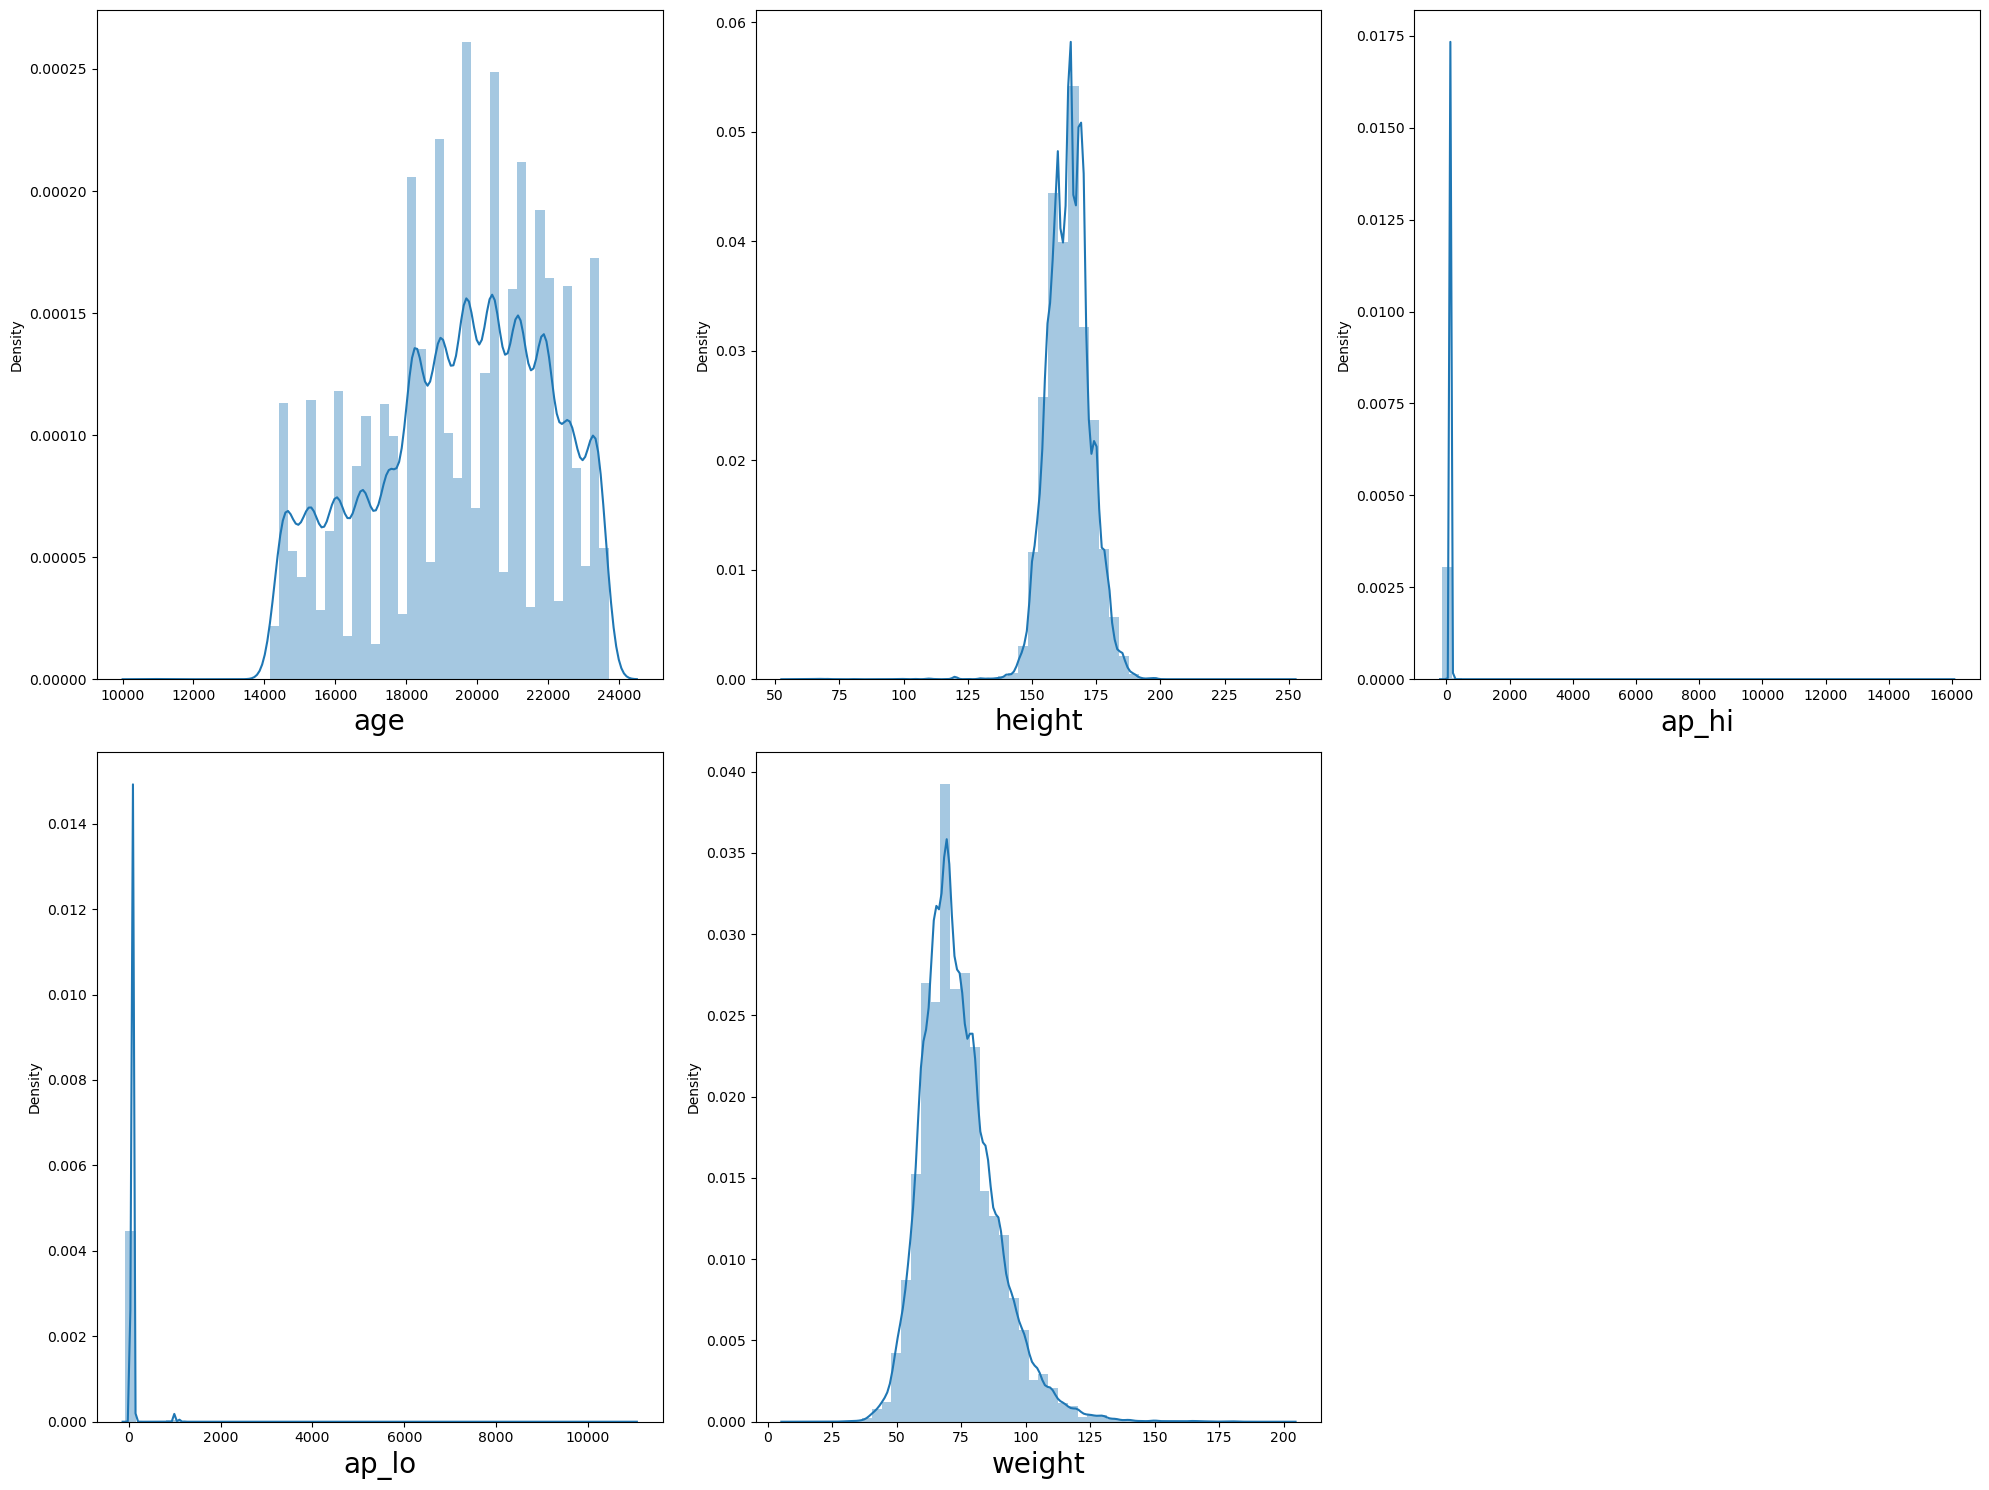

In [18]:
#checking the disc plot of discrite data of dustribution data
# Setting up the figure size for the plots, this will ensure the plots are large and clear
plt.figure(figsize=(20, 15))  

plotnumber = 1  # Initialize a counter to keep track of the subplot position

# Looping through the columns we want to plot distributions for
for column in df[['age', 'height', 'ap_hi', 'ap_lo', 'weight']]:
    
    # Check if the current plotnumber is less than or equal to 6
    if plotnumber <= 6:
        
        # Create a subplot in a 2x3 grid (2 rows, 3 columns)
        # This means a maximum of 6 subplots can be created, one for each feature
        ax = plt.subplot(2, 3, plotnumber)
        
        # Plot the distribution of the column using seaborn's distplot
        # distplot creates a histogram along with a kernel density estimate (KDE)
        sns.distplot(df[column]) 
        
        # Label the x-axis of the plot with the column name for clarity
        plt.xlabel(column, fontsize=20)
    
    # Increment the plotnumber to move to the next subplot
    plotnumber += 1

# Adjust the layout so that the subplots do not overlap with each other
plt.tight_layout()

In [ ]:
#as per the graph there is skewness is at left side there is extreme skewness
#indications that there are outliers, so we hsve to remove the outliers

###### Z distribution/Stastics
box plot(IQR method)
when you want to know which data having outlier, if you wnat to know use IQR
If you dont want to see that time u can use Z distribution/Stastics

#so when we are converting extreme data is going in parallel side, so that time U=0, 1StandardDeviation, 2SD, 3SD

1SD - 68% of data

2SD - 95% of data

3SD - 99.7% of data

#so it covers 68,95,99.7 of dataset

#it is upto you how much SD data yu want

#Most time we uses 3SD, but it is depends in project to project

In [19]:
# Importing zscore from the scipy library
from scipy.stats import zscore

# Calculating the z-scores for the selected columns in the dataframe (age, height, ap_hi, ap_lo, weight)
# Z-score is the number of standard deviations a data point is from the mean
# The formula for Z-score is: (x - mean) / std
z_score = zscore(df[['age', 'height', 'ap_hi', 'ap_lo', 'weight']])

# Taking the absolute value of z-scores
# Since we are interested in filtering out extreme values (outliers), we need the magnitude of the deviation, not the direction
abs_z_score = np.abs(z_score)  # This converts all z-scores to positive values (e.g., -2.5 becomes 2.5)

# Applying the 3 standard deviations (3SD) rule to filter data
# The condition checks where all the absolute z-scores are less than 3 for each row (i.e., within 3 standard deviations)
filtering_entry = (abs_z_score < 3).all(axis=1)

# The rows that have values within 3 standard deviations (3SD) are retained
# This means rows with extreme values beyond 3SD (considered as outliers) are filtered out
df = df[filtering_entry]

# Displaying the descriptive statistics for the filtered data
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000,67384.000000
mean,19466.692241,1.347189,164.374629,73.563569,126.162086,81.285394,1.361881,1.223495,0.087128,0.053262,0.803959,0.492743
std,2466.912538,0.476080,7.689291,13.194289,17.857326,10.234383,0.676988,0.569419,0.282024,0.224557,0.397003,0.499951
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Above is another way of removing outliers

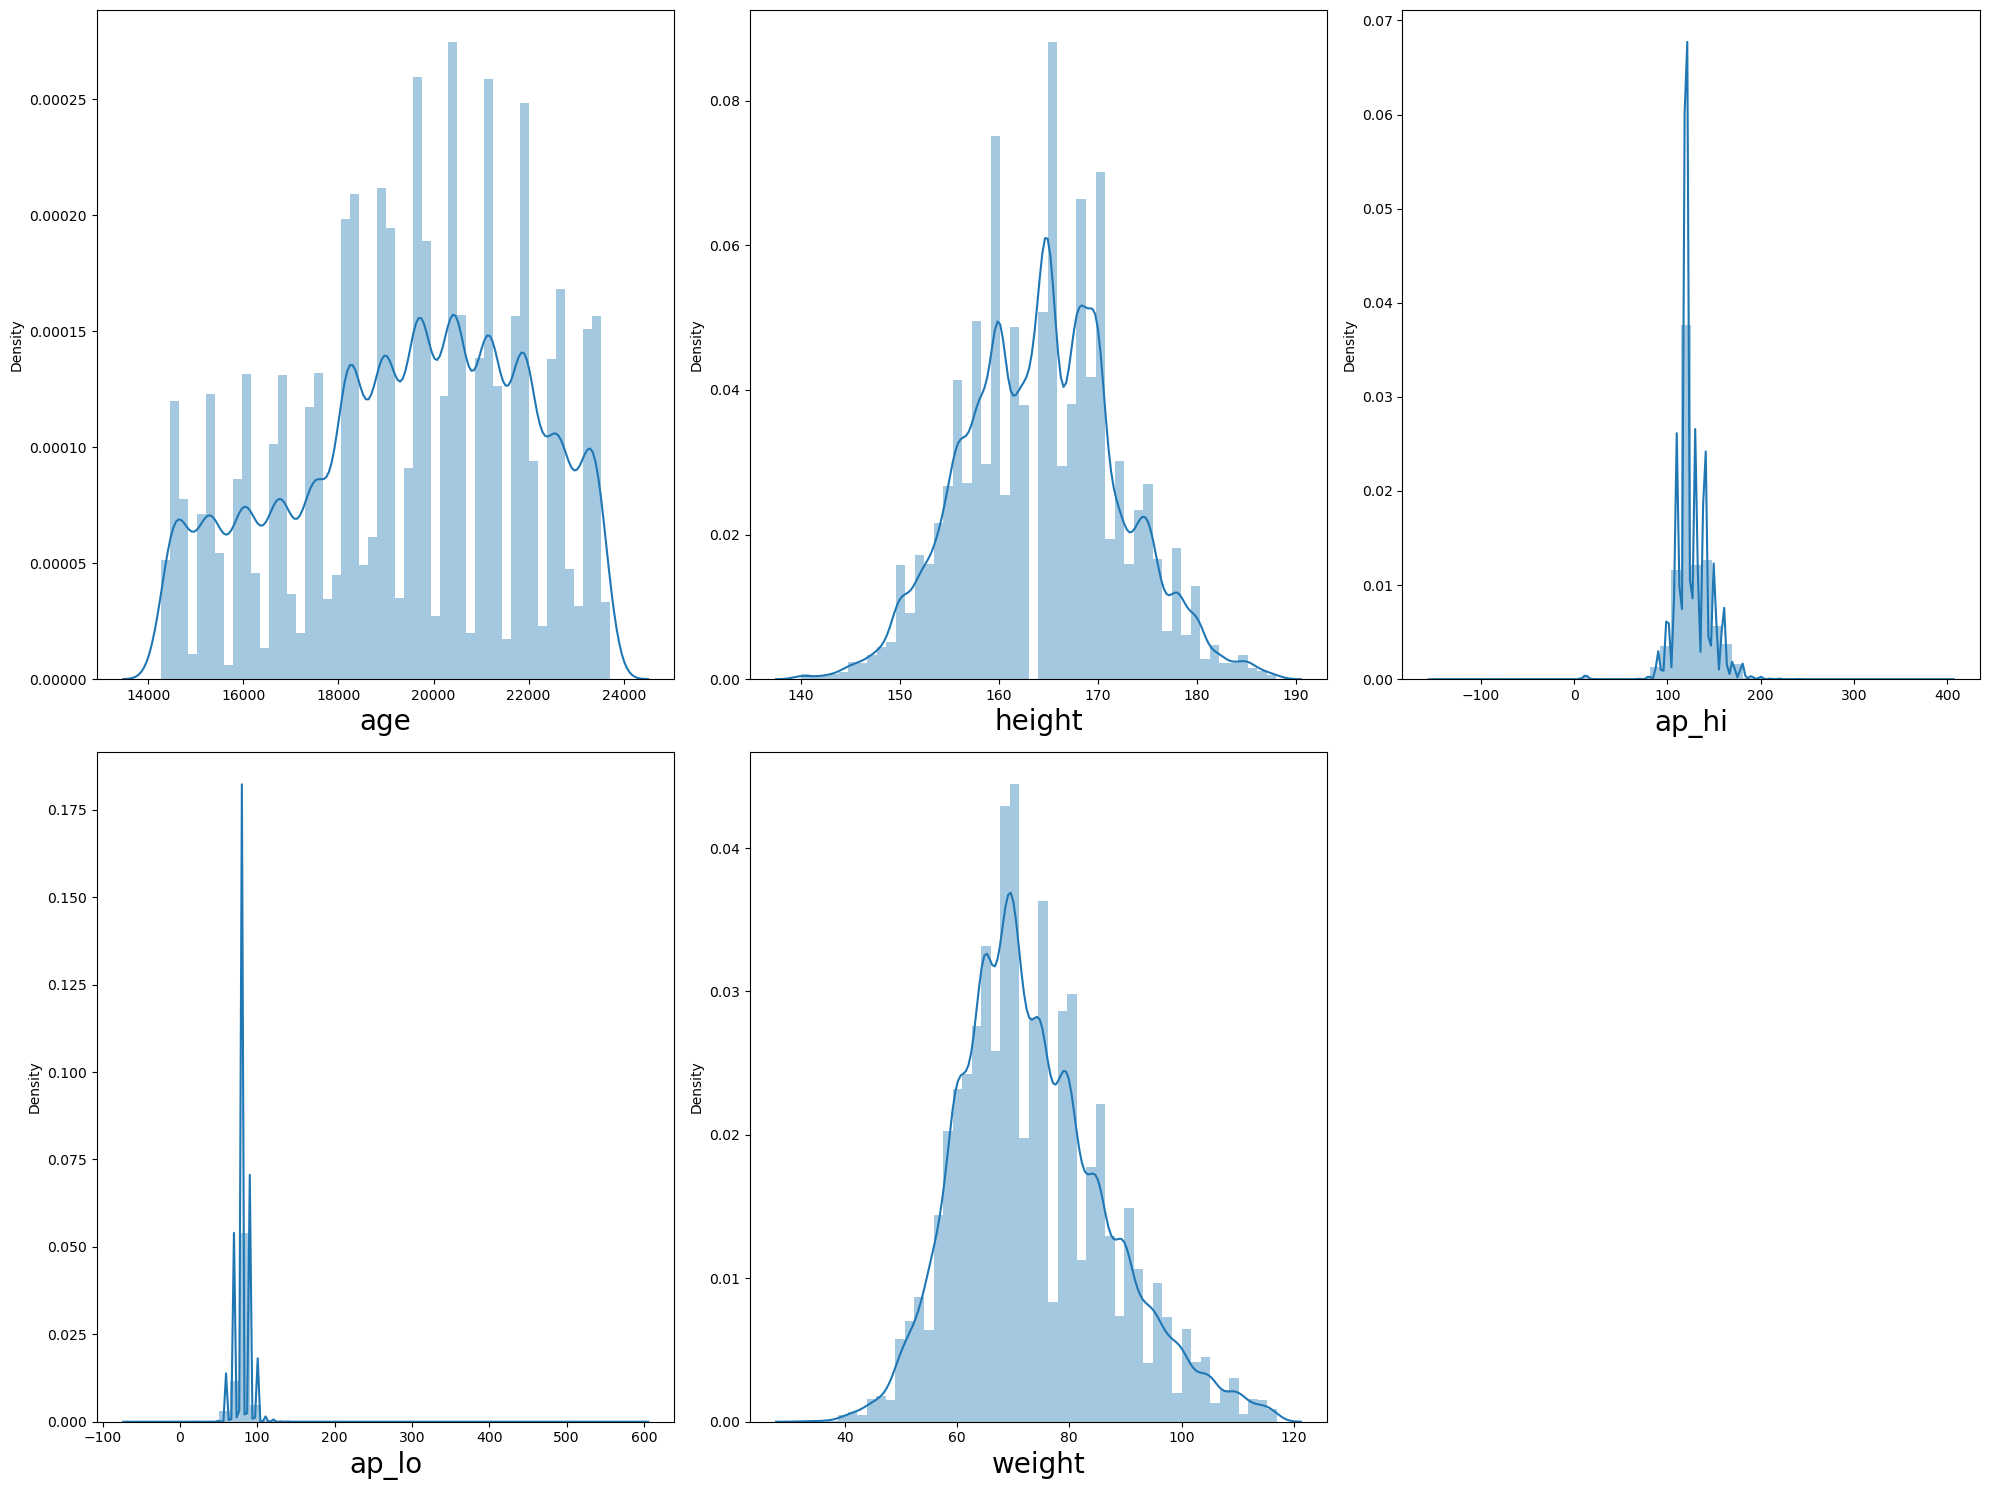

In [20]:
# Setting the figure size for the plot, which will be 20 inches wide and 15 inches tall
plt.figure(figsize=(20,15))

# Initialize a variable to keep track of the plot number in the subplot grid
plotnumber = 1

# Looping through the selected columns to plot their distribution (age, height, ap_hi, ap_lo, weight)
for column in df[['age', 'height', 'ap_hi', 'ap_lo', 'weight']]:
    
    # The condition ensures that we don't exceed the number of subplots (maximum of 6 in this case)
    if plotnumber < 6:
        
        # Creating a subplot layout with 2 rows and 3 columns
        # plotnumber determines the position of the subplot
        ax = plt.subplot(2, 3, plotnumber)
        
        # Plotting the distribution of the column using Seaborn's distplot
        # distplot shows both a histogram and a kernel density estimate (KDE) to visualize the distribution
        sns.distplot(df[column])
        
        # Setting the x-axis label to the column name with a font size of 20 for clarity
        plt.xlabel(column, fontsize=20)
    
    # Increment the plotnumber for the next subplot
    plotnumber += 1

# Adjust the layout to make sure subplots do not overlap
plt.tight_layout()


In [21]:
df.shape

(67384, 12)

In [22]:
# Separating features (X) and the target variable (y)

# X contains all the features of the dataset except for the target variable 'cardio'
# 'cardio' is the column representing the label (whether the person has a cardiovascular disease or not)
X = df.drop(columns=['cardio'], axis=1)  # Dropping the 'cardio' column from the dataframe to create the feature set

# y contains the target variable (cardio), which is the column we are trying to predict
y = df['cardio']  # This assigns the 'cardio' column as the target variable


In [23]:
#split in to train test split dataset

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=41)

In [24]:
#write one function and call as many times to check accuracy_score of disserent model

# Function to calculate and print the accuracy and classification report for both train and test sets
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    
    # If we are evaluating the training performance
    if train:
        # Predicting the labels for the training set
        y_pred = clf.predict(x_train)
        
        # Print the results for training
        print("\n================Train Result===================")
        
        # Calculate and print the accuracy score for the training set
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    # If train is False, evaluate the model on the test data
    elif train == False:
        # Predicting the labels for the test set
        pred = clf.predict(x_test)
        
        # Print the results for testing
        print("\n================Test Result===================")
        
        # Calculate and print the accuracy score for the test set
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        
        # Print the classification report for the test set
        # Classification report shows precision, recall, F1-score, and support for each class
        print('\n\nTest Classification Report\n', classification_report(y_test, pred, digits=2))

#model confidance/accuracy

In [25]:
#Initate Random Forest Classifier and train
random_cif = RandomForestClassifier()

In [26]:
#train thr model
random_cif.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
#call the functions and pass the dataset t check train and test score
metric_score(random_cif, x_train,x_test,y_train,y_test, train=True)

metric_score(random_cif, x_train,x_test,y_train,y_test, train=False)


================Train Result===================
Accuracy Score: 99.98%

================Test Result===================
Accuracy Score: 71.15%


Test Classification Report
               precision    recall  f1-score   support

           0       0.71      0.72      0.72     10327
           1       0.71      0.70      0.70      9889

    accuracy                           0.71     20216
   macro avg       0.71      0.71      0.71     20216
weighted avg       0.71      0.71      0.71     20216



In [ ]:
#so as checked the result the train and test result is to much gap in between
#when there is gap we have to train such a way that the train and test score should be closer, but here 30% too much

In [ ]:
#lets tune the parameter using the Grid Search CV
#best way to keep both score close to each other

In [ ]:
#In this Bagging Classifier the base estimator we use KNN, manually we have chosen this, but in the Bagging Classifier
#if we dont mention any thing by default it will take Decision Tree & which is the BEst base model

In [28]:
#So in the below code we added only 1 Parameter is n_estimator :[13,15], other are all of Decision Tree Parameter
#Random Forest CLassifier

params = {
    'n_estimators': [13, 15],             # Number of trees in the forest
    'criterion': ['entropy', 'gini'],     # Function to measure the quality of a split
    'max_depth': [10, 15],                # Maximum depth of the tree
    'min_samples_split': [10, 11],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 6]            # Minimum number of samples required to be at a leaf node
}



In [29]:
# Perform hyperparameter tuning using GridSearchCV
grd = GridSearchCV(random_cif, param_grid=params)

# Fit the GridSearchCV object to the training data
grd.fit(x_train,y_train)

# Output the best hyperparameters found by GridSearchCV
print('best_params = >', grd.best_params_)

best_params = > {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}


In [30]:
#result is the best parameters
#Insted of manually writing paramaeters in the code there is another way is take, grid_best_estimators_
#It will directly we can use parameter

random_cif=grd.best_estimator_
random_cif.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=13)

In [31]:
#call the functions and pass the dataset t check train and test score
metric_score(random_cif, x_train,x_test,y_train,y_test, train=True)

metric_score(random_cif, x_train,x_test,y_train,y_test, train=False)


================Train Result===================
Accuracy Score: 74.87%

================Test Result===================
Accuracy Score: 73.25%


Test Classification Report
               precision    recall  f1-score   support

           0       0.72      0.79      0.75     10327
           1       0.75      0.68      0.71      9889

    accuracy                           0.73     20216
   macro avg       0.73      0.73      0.73     20216
weighted avg       0.73      0.73      0.73     20216



##### Lets plot ROC AUC curve
to choose best model out of 4-5 model

ROC AUC is only workk on the classification model not on regression model

In [36]:
#plot ROC/AUC for multiple models without hyperparameter tuning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [56]:
# Split the features (X) and target variable (y) from the dataset 'df'
X = df.drop(columns=['cardio'], axis=1)  # Features (all columns except 'cardio')
y = df['cardio']  # Target variable (the 'cardio' column)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)


In [38]:
#Train our model- Initializing

lr= LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

#lets check roc auc curve for thr fitted model

True Posotive rate = out of 100 actual cardio patients how many our model predicted as cardio patients correctly (higher the better)

False positive rate = How many people were predicted as cardio patients but in reality they were health (lower the better)

In [41]:
#since it is difficult to evaulate the score based on only TPR and FPR data, there comes AUC

models = {'Logostic Regression':lr,
        'Decision Tree':dt,
        'KNN':knn,
        "Random Forest":rf}

Thresholds for Logostic Regression [1.99879727e+00 9.98797275e-01 9.97751242e-01 ... 2.06186137e-03
 2.03360141e-03 5.70674080e-06]
Thresholds for Decision Tree [2.  1.  0.5 0. ]
Thresholds for KNN [2.  1.  0.8 0.6 0.4 0.2 0. ]
Thresholds for Random Forest [2.         1.         0.99       0.98       0.97       0.96
 0.95       0.94       0.93       0.92       0.91       0.9
 0.89       0.88       0.87       0.86       0.85       0.84
 0.83666667 0.83       0.82333333 0.82       0.81       0.8
 0.79       0.78       0.7775     0.77       0.76       0.75
 0.74       0.73       0.72666667 0.72       0.71       0.7
 0.69       0.685      0.68       0.675      0.67       0.66666667
 0.665      0.6635     0.66       0.65666667 0.65       0.64666667
 0.64       0.63       0.62       0.615      0.61       0.6
 0.59666667 0.59       0.58666667 0.58       0.57       0.56
 0.55       0.54666667 0.54       0.535      0.53       0.525
 0.52       0.51       0.5        0.495      0.49       0.485
 

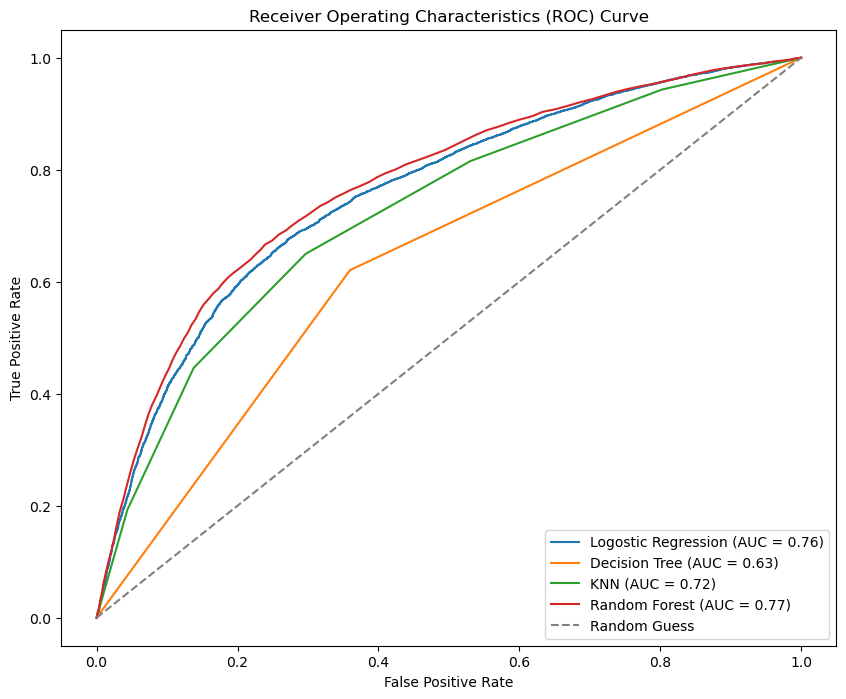

In [57]:
#calculate the ROC curve and AUC scoe for eac model

plt.figure(figsize=(10,8))  # Set the figure size for the plot (10 inches by 8 inches)

# Loop over each model in the models dictionary
for name, model in models.items():
    model.fit(x_train, y_train)  # Fit the model to the training data
    
    # Predict the probabilities for the positive class (class 1) on the test data
    y_prob = model.predict_proba(x_test)[:, 1]
    
    # Calculate the ROC curve metrics (false positive rate and true positive rate)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Print the threshold values for the ROC curve (optional)
    print('Thresholds for', name, _)
    
    # Compute the Area Under the Curve (AUC) score
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

# Plot the diagonal line representing random guessing (a model with no predictive power)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels to the x and y axes
plt.xlabel('False Positive Rate')  # X-axis label: False Positive Rate (FPR)
plt.ylabel('True Positive Rate')   # Y-axis label: True Positive Rate (TPR)

# Add a title to the plot
plt.title('Receiver Operating Characteristics (ROC) Curve')

# Add a legend to the lower right corner of the plot
plt.legend(loc='lower right')

# Display the plot
plt.show()
